# Computo de Alto Desempeño
### Roberto Guerrero Bueno (rguerrero.mca16@lania.edu.mx)

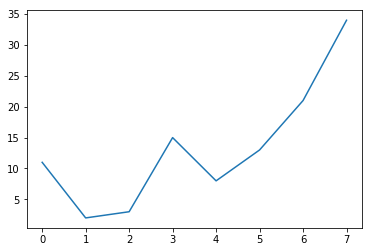

In [1]:
#Ejemplo de una grafica sencilla
import matplotlib.pyplot as plt
import numpy as np
lista1 = [11,2,3,15,8,13,21,34]
plt.plot(lista1)
plt.show()

In [2]:
import time
import numpy as np
import ipyparallel as ipp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
c = ipp.Client()
c.ids

[0, 1, 2, 3]

In [4]:
c[0:3].apply_sync(lambda: "clase")

['clase', 'clase', 'clase']

In [5]:
#Definimos una funcion que determina si un numero dado es primo:
PrimeQ=lambda x: all(x % i != 0 for i in range(int(x**0.5)+1)[2:]) and x>1

In [13]:
#hacer una grafica modicando el valor de x = 2**n de 1 hasta donde se pueda
import timeit

In [14]:
%%timeit
x = 2**30
for i in np.arange(int(x**0.5)+1)[2:]:
    x % i

10 loops, best of 3: 47.7 ms per loop


In [47]:
def ciclo(x):
    import numpy as np
    return all(x % i for i in np.arange(int(x**0.5)+1)[3:])

In [48]:
tam = range(31)[1:]

In [49]:
print tam

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [50]:
dview = c[:]

## Grafica I

In [51]:
tiempos = []
for i in tam:
    timeit = %timeit -o dview.map_sync(ciclo,2**np.arange(i))
    tiempos.append(timeit.best)

10 loops, best of 3: 58.4 ms per loop
10 loops, best of 3: 99.6 ms per loop
10 loops, best of 3: 120 ms per loop
1 loop, best of 3: 190 ms per loop
1 loop, best of 3: 176 ms per loop
10 loops, best of 3: 180 ms per loop
1 loop, best of 3: 192 ms per loop
10 loops, best of 3: 195 ms per loop
10 loops, best of 3: 195 ms per loop
1 loop, best of 3: 203 ms per loop
1 loop, best of 3: 210 ms per loop
1 loop, best of 3: 212 ms per loop
1 loop, best of 3: 195 ms per loop
1 loop, best of 3: 194 ms per loop
1 loop, best of 3: 172 ms per loop
10 loops, best of 3: 187 ms per loop
10 loops, best of 3: 194 ms per loop
1 loop, best of 3: 212 ms per loop
1 loop, best of 3: 204 ms per loop
10 loops, best of 3: 181 ms per loop
10 loops, best of 3: 142 ms per loop
10 loops, best of 3: 150 ms per loop
10 loops, best of 3: 178 ms per loop
10 loops, best of 3: 171 ms per loop
10 loops, best of 3: 171 ms per loop
10 loops, best of 3: 181 ms per loop
1 loop, best of 3: 171 ms per loop
10 loops, best of 3: 17

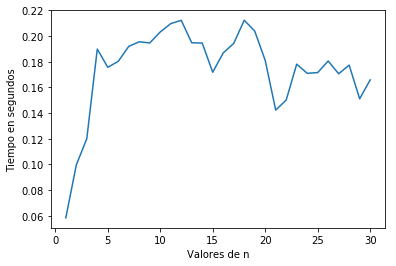

In [56]:
plt.plot(tam,tiempos,label="Grafica 1")
plt.xlabel('Valores de n')
plt.ylabel('Tiempo en segundos')

## Grafica de PrimeQ0

In [54]:
def PrimeQ0(x):
    import numpy as np
    return all(x % i for i in np.arange(int(x**0.5)+1)[2:])

In [55]:
tiemposPrimeQ0 = []
for i in tam:
    timeit = %timeit -o dview.map_sync(PrimeQ0,2**np.arange(i))
    tiemposPrimeQ0.append(timeit.best)

10 loops, best of 3: 53.5 ms per loop
10 loops, best of 3: 102 ms per loop
10 loops, best of 3: 141 ms per loop
10 loops, best of 3: 187 ms per loop
10 loops, best of 3: 199 ms per loop
10 loops, best of 3: 175 ms per loop
10 loops, best of 3: 183 ms per loop
10 loops, best of 3: 177 ms per loop
10 loops, best of 3: 183 ms per loop
10 loops, best of 3: 186 ms per loop
1 loop, best of 3: 198 ms per loop
1 loop, best of 3: 192 ms per loop
1 loop, best of 3: 186 ms per loop
10 loops, best of 3: 196 ms per loop
10 loops, best of 3: 194 ms per loop
10 loops, best of 3: 189 ms per loop
10 loops, best of 3: 195 ms per loop
10 loops, best of 3: 189 ms per loop
10 loops, best of 3: 181 ms per loop
10 loops, best of 3: 182 ms per loop
1 loop, best of 3: 184 ms per loop
10 loops, best of 3: 181 ms per loop
10 loops, best of 3: 178 ms per loop
10 loops, best of 3: 179 ms per loop
10 loops, best of 3: 175 ms per loop
10 loops, best of 3: 178 ms per loop
10 loops, best of 3: 181 ms per loop
10 loops

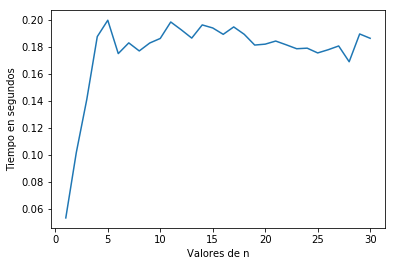

In [57]:
plt.plot(tam,tiemposPrimeQ0,label="Grafica PrimeQ0")
plt.xlabel('Valores de n')
plt.ylabel('Tiempo en segundos')

## Grafica de PrimeQ1

In [58]:
def PrimeQ1(x):
    import numpy as np
    return np.all(np.array([x % i for i in np.arange(np.int(x**0.5)+1)[2:]]))

In [59]:
tiemposPrimeQ1 = []
for i in tam:
    timeit = %timeit -o dview.map_sync(PrimeQ1,2**np.arange(i))
    tiemposPrimeQ1.append(timeit.best)

10 loops, best of 3: 60.9 ms per loop
10 loops, best of 3: 108 ms per loop
10 loops, best of 3: 152 ms per loop
1 loop, best of 3: 198 ms per loop
1 loop, best of 3: 196 ms per loop
1 loop, best of 3: 196 ms per loop
1 loop, best of 3: 204 ms per loop
10 loops, best of 3: 201 ms per loop
1 loop, best of 3: 197 ms per loop
1 loop, best of 3: 197 ms per loop
1 loop, best of 3: 192 ms per loop
1 loop, best of 3: 198 ms per loop
1 loop, best of 3: 188 ms per loop
1 loop, best of 3: 200 ms per loop
1 loop, best of 3: 208 ms per loop
1 loop, best of 3: 201 ms per loop
1 loop, best of 3: 194 ms per loop
10 loops, best of 3: 201 ms per loop
1 loop, best of 3: 204 ms per loop
1 loop, best of 3: 212 ms per loop
1 loop, best of 3: 210 ms per loop
1 loop, best of 3: 202 ms per loop
1 loop, best of 3: 212 ms per loop
1 loop, best of 3: 226 ms per loop
1 loop, best of 3: 237 ms per loop
1 loop, best of 3: 265 ms per loop
1 loop, best of 3: 286 ms per loop
1 loop, best of 3: 334 ms per loop
1 loop, b

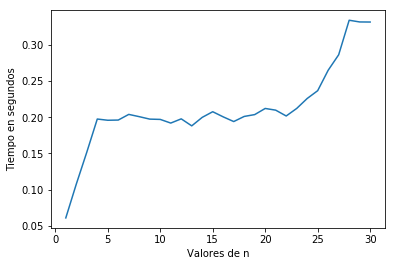

In [60]:
plt.plot(tam,tiemposPrimeQ1,label="Grafica PrimeQ1")
plt.xlabel('Valores de n')
plt.ylabel('Tiempo en segundos')

## Grafica de PrimeQ2

In [61]:
def PrimeQ2(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    residuos = np.mod(x,lista)
    return np.all(residuos)

In [62]:
tiemposPrimeQ2 = []
for i in tam:
    timeit = %timeit -o dview.map_sync(PrimeQ2,2**np.arange(i))
    tiemposPrimeQ2.append(timeit.best)

10 loops, best of 3: 61.2 ms per loop
10 loops, best of 3: 109 ms per loop
10 loops, best of 3: 142 ms per loop
1 loop, best of 3: 188 ms per loop
1 loop, best of 3: 176 ms per loop
10 loops, best of 3: 188 ms per loop
10 loops, best of 3: 189 ms per loop
1 loop, best of 3: 209 ms per loop
10 loops, best of 3: 198 ms per loop
1 loop, best of 3: 198 ms per loop
1 loop, best of 3: 189 ms per loop
10 loops, best of 3: 192 ms per loop
10 loops, best of 3: 195 ms per loop
10 loops, best of 3: 203 ms per loop
1 loop, best of 3: 199 ms per loop
10 loops, best of 3: 193 ms per loop
10 loops, best of 3: 173 ms per loop
10 loops, best of 3: 195 ms per loop
10 loops, best of 3: 198 ms per loop
1 loop, best of 3: 187 ms per loop
1 loop, best of 3: 180 ms per loop
10 loops, best of 3: 189 ms per loop
10 loops, best of 3: 196 ms per loop
1 loop, best of 3: 202 ms per loop
10 loops, best of 3: 191 ms per loop
10 loops, best of 3: 192 ms per loop
10 loops, best of 3: 195 ms per loop
10 loops, best of 

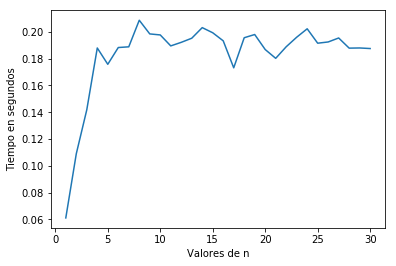

In [63]:
plt.plot(tam,tiemposPrimeQ2,label="Grafica PrimeQ2")
plt.xlabel('Valores de n')
plt.ylabel('Tiempo en segundos')

## Grafica de comparacion de las funciones PrimeQ

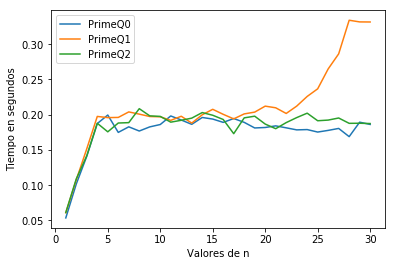

In [65]:
plt.plot(tam,tiemposPrimeQ0,label="PrimeQ0")
plt.plot(tam,tiemposPrimeQ1,label="PrimeQ1")
plt.plot(tam,tiemposPrimeQ2,label="PrimeQ2")
plt.xlabel('Valores de n')
plt.ylabel('Tiempo en segundos')
plt.legend()

## Grafica de PrimeQ1 (segunda pasada)

In [67]:
#Se probara otra vez la funcion PrimeQ1 al tener resultados irregulares
tiemposPrimeQ1v2 = []
for i in tam:
    timeit = %timeit -o dview.map_sync(PrimeQ1,2**np.arange(i))
    tiemposPrimeQ1v2.append(timeit.best)

10 loops, best of 3: 54 ms per loop
10 loops, best of 3: 100 ms per loop
10 loops, best of 3: 139 ms per loop
10 loops, best of 3: 176 ms per loop
10 loops, best of 3: 178 ms per loop
10 loops, best of 3: 181 ms per loop
10 loops, best of 3: 180 ms per loop
10 loops, best of 3: 175 ms per loop
10 loops, best of 3: 182 ms per loop
10 loops, best of 3: 179 ms per loop
10 loops, best of 3: 179 ms per loop
10 loops, best of 3: 181 ms per loop
10 loops, best of 3: 181 ms per loop
10 loops, best of 3: 181 ms per loop
10 loops, best of 3: 182 ms per loop
10 loops, best of 3: 178 ms per loop
10 loops, best of 3: 180 ms per loop
10 loops, best of 3: 181 ms per loop
10 loops, best of 3: 182 ms per loop
10 loops, best of 3: 182 ms per loop
10 loops, best of 3: 181 ms per loop
10 loops, best of 3: 185 ms per loop
10 loops, best of 3: 193 ms per loop
10 loops, best of 3: 199 ms per loop
1 loop, best of 3: 208 ms per loop
1 loop, best of 3: 224 ms per loop
1 loop, best of 3: 259 ms per loop
1 loop, 

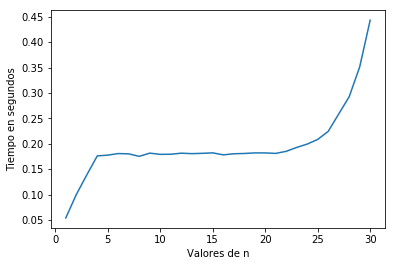

In [68]:
plt.plot(tam,tiemposPrimeQ1v2,label="PrimeQ1")
plt.xlabel('Valores de n')
plt.ylabel('Tiempo en segundos')

## Segunda grafica de comparacion de PrimeQ

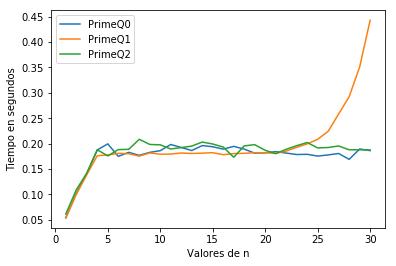

In [69]:
plt.plot(tam,tiemposPrimeQ0,label="PrimeQ0")
plt.plot(tam,tiemposPrimeQ1v2,label="PrimeQ1")
plt.plot(tam,tiemposPrimeQ2,label="PrimeQ2")
plt.xlabel('Valores de n')
plt.ylabel('Tiempo en segundos')
plt.legend()